In [1]:
# Which country has the highest level of energy consumption and greenhouse gas emissions?
# Is there a significant correlation between greenhouse gas emissions and energy consumption
# 
# 
#  Analysis:
# 
#  From the data we can see that China has emits the largest amount of greenhouse gas emissions into the atmosphere. 
# The data also shows us that China has the largest energy consumption out of any other country. We can make the coorelation that higher energy consumption also means 
# higher C02 emissions in the atmosphere. 

In [2]:
# import Dependencies
import pandas as pd
from pathlib import Path
import csv
import os
import json
import requests
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats as st
from scipy.stats import linregress

In [3]:
#might use this csv might not

#residential_energy= Path(r"C:\Users\Flore\OneDrive\Desktop\Class Folder\Project1_group4\denisa_project\test_energy_data.csv")
#pd.read_csv(residential_energy)


In [4]:

#input data from csv & load file
energy_data= Path(r"C:\Users\Flore\OneDrive\Desktop\Class Folder\Project1_group4\denisa_project\owid-energy-data.csv")
df = pd.read_csv(energy_data)

#clean the data set and drop and missing values for the energy consuption and green house gas emissions
df_cleaned = df.dropna(subset=["primary_energy_consumption", "greenhouse_gas_emissions"])
df_cleaned.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
124,Afghanistan,2000,AFG,19542986.0,1.128379e+10,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
125,Afghanistan,2001,AFG,19688634.0,1.102127e+10,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
126,Afghanistan,2002,AFG,21000258.0,1.880487e+10,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
127,Afghanistan,2003,AFG,22645136.0,2.107434e+10,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
128,Afghanistan,2004,AFG,23553554.0,2.233257e+10,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN


In [5]:
#filter out data

single_countrydf= df_cleaned[["country", "year", "primary_energy_consumption", "greenhouse_gas_emissions"]]
single_countrydf.head()

,country,year,primary_energy_consumption,greenhouse_gas_emissions
124,Afghanistan,2000,5.914,0.12
125,Afghanistan,2001,4.664,0.15
126,Afghanistan,2002,4.428,0.12
127,Afghanistan,2003,5.208,0.22
128,Afghanistan,2004,4.810,0.18


In [6]:
#filter out the data that isnt actual countries
non_countries = ["World", "Asia", "Europe", "Africa", "North America", "South America", "Oceania", "ASEAN (Ember)", "Central & South America (EIA)", "Central African Republic", "Central America (EI)", "Central and South America (Shift)", "EU28 (Shift)" , "European Union (27)" "G7 (Ember)", "High-income countries", "Lower-middle-income countries", "Middle East (EIA)" "Middle East (Ember)", "Non-OPEC (EIA)", "OECD (EI)", "OPEC (Shift)", "Upper-middle-income countries"]
cleaned_version = single_countrydf[~single_countrydf["country"].isin(non_countries)]
cleaned_version.head()

,country,year,primary_energy_consumption,greenhouse_gas_emissions
124,Afghanistan,2000,5.914,0.12
125,Afghanistan,2001,4.664,0.15
126,Afghanistan,2002,4.428,0.12
127,Afghanistan,2003,5.208,0.22
128,Afghanistan,2004,4.810,0.18


In [7]:
#filter our the data based on the last 5 years
latest_year = single_countrydf["year"].max()
last_5_years = latest_year - 5
filtered_last_5_years = cleaned_version[cleaned_version["year"] > last_5_years]
filtered_last_5_years.head()

,country,year,primary_energy_consumption,greenhouse_gas_emissions
143,Afghanistan,2019,30.314,0.16
144,Afghanistan,2020,27.393,0.10
145,Afghanistan,2021,27.135,0.11
632,Albania,2019,33.296,0.12
633,Albania,2020,31.988,0.13


In [8]:
# Now find the country that has the highest level of energy consumptions and greenhouse gas

highest_energy_country = (
    filtered_last_5_years.groupby("country")["primary_energy_consumption"].sum().idxmax()
)
highest_emissions_country = (
    filtered_last_5_years.groupby("country")["greenhouse_gas_emissions"].sum().idxmax()
)
highest_energy_data = filtered_last_5_years[
    filtered_last_5_years["country"] == highest_energy_country
]
highest_emissions_data = filtered_last_5_years[
    filtered_last_5_years["country"] == highest_emissions_country
]



print(f"Highest Energy Consumption Country: {highest_energy_country}")
print(highest_energy_data.to_string(index=False))
print(f"\nHighest Greenhouse Gas Emissions Country: {highest_emissions_country}")
print(highest_emissions_data.to_string(index=False))

Highest Energy Consumption Country: China
country  year  primary_energy_consumption  greenhouse_gas_emissions
  China  2019                   40188.543                   4649.25
  China  2020                   41493.711                   4716.12
  China  2021                   43847.004                   5110.79
  China  2022                   44516.312                   5183.77
  China  2023                   47427.562                   5508.48

Highest Greenhouse Gas Emissions Country: China
country  year  primary_energy_consumption  greenhouse_gas_emissions
  China  2019                   40188.543                   4649.25
  China  2020                   41493.711                   4716.12
  China  2021                   43847.004                   5110.79
  China  2022                   44516.312                   5183.77
  China  2023                   47427.562                   5508.48


Text(0, 0.5, 'Energy TWh')

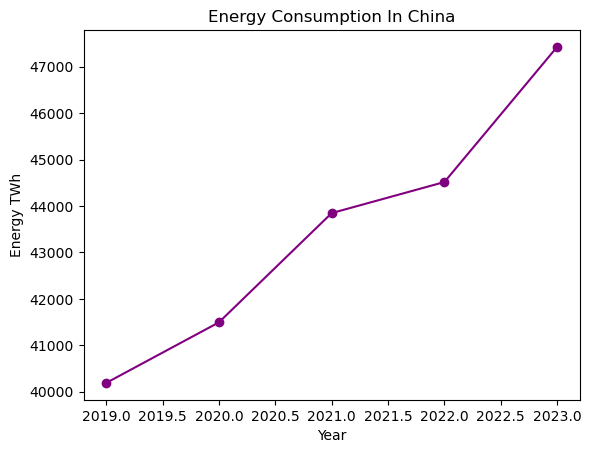

In [9]:
#make a linegraph to display data for energy consumption

plt.plot(highest_energy_data["year"], highest_energy_data["primary_energy_consumption"], 
         marker='o', linestyle='-', color='purple', label="Energy Consumption")
plt.title('Energy Consumption In China')
plt.xlabel('Year')
plt.ylabel('Energy TWh')


Text(0, 0.5, ' MtCO₂e')

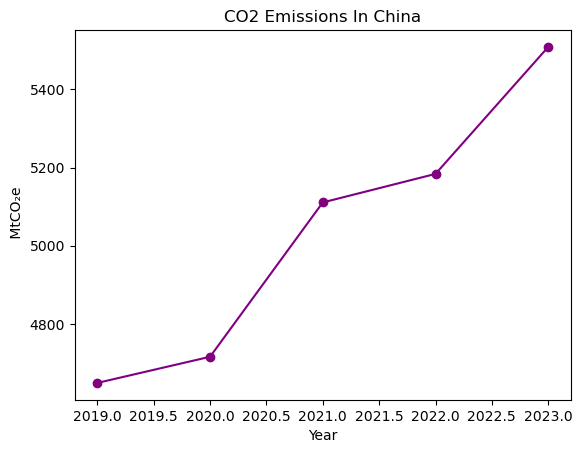

In [13]:
#make a linegraph to display data for green house gas emissions
plt.plot(highest_emissions_data["year"], highest_emissions_data["greenhouse_gas_emissions"], 
         marker='o', linestyle='-', color='purple', label="Energy Consumption")
plt.title('CO2 Emissions In China')
plt.xlabel('Year')
plt.ylabel(' MtCO₂e')


In [11]:
#Start extracting data from csv. Looking for data for a few different  countries
#.isin: Checks whether each value in the "country" column is present in the list selected_countries

selected_countries = ["China", "India", "Brazil", "Pakistan", "Mexico"]

new_df= df_cleaned[df_cleaned["country"].isin(selected_countries)]

latest_year = new_df["year"].max()
df_recent = new_df[new_df["year"] == latest_year]
df_final = df_recent[["country", "year", "primary_energy_consumption", "greenhouse_gas_emissions"]]
df_final.head()

,country,year,primary_energy_consumption,greenhouse_gas_emissions
3060,Brazil,2023,3853.715,70.14
4505,China,2023,47427.562,5508.48
9328,India,2023,10837.855,1403.98
12008,Mexico,2023,2348.044,179.23
15532,Pakistan,2023,936.701,70.96


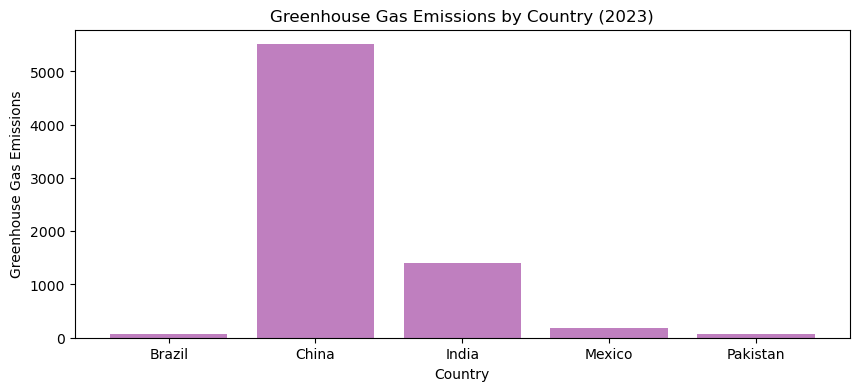

In [12]:
#create bar graph showing energy consuption by country and greenhouse gas emissions 

plt.figure(figsize=(10, 4))
plt.bar(df_final["country"], df_final["greenhouse_gas_emissions"], color='purple', alpha=0.5)
plt.xlabel("Country")
plt.ylabel("Greenhouse Gas Emissions")
plt.title("Greenhouse Gas Emissions by Country (2023)")
plt.show()